# **Assignment \#2**: Machine Learning MC886/MO444
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2021s2



In [5]:
# TODO: RA & Name 
print('RA1: ' + 'Nome1')
print('RA2: ' + 'Nome2')

RA1: Nome1
RA2: Nome2


## Objective: Predict cancer mortality rates for US counties. 

Explore **linear regression** alternatives and come up with the best possible model to the problems, avoiding overfitting. In particular, predict the **TARGET_deathRate** from their attributes.

## Dataset

These data were aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov.  

The dataset contains the death rate and attributes of 3,047 counties.

Dataset Information: You should respect the following traininig/test split: 2042 training examples, and 305 test examples.

There are 33 attributes as follows: 

Data Dictionary

- 1: **avgAnnCount**: Mean number of reported cases of cancer diagnosed annually (a)

- 2: **avgDeathsPerYear**: Mean number of reported mortalities due to cancer (a)

- 3: **incidenceRate**: Mean per capita (100,000) cancer diagoses(a)

- 4: **medianIncome**: Median income per county (b)

- 5: **popEst2015**: Population of county (b)

- 6: **povertyPercent**: Percent of populace in poverty (b)

- 7: **studyPerCap**: Per capita number of cancer-related clinical trials per county (a)

- 8: **binnedInc**: Median income per capita binned by decile (b)

- 9: **MedianAge**: Median age of county residents (b)

- 10: **MedianAgeMale**: Median age of male county residents (b)

- 11: **MedianAgeFemale**: Median age of female county residents (b)

- 12: **Geography**: County name (b)

- 13: **AvgHouseholdSize**: Mean household size of county (b)

- 14: **PercentMarried**: Percent of county residents who are married (b)

- 15: **PctNoHS18_24**: Percent of county residents ages 18-24 highest education attained: less than high school (b)

- 16: **PctHS18_24**: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

- 17: **PctSomeCol18_24**: Percent of county residents ages 18-24 highest education attained: some college (b)

- 18: **PctBachDeg18_24**: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

- 19: **PctHS25_Over**: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

- 20: **PctBachDeg25_Over**: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

- 21: **PctEmployed16_Over**: Percent of county residents ages 16 and over employed (b)

- 22: **PctUnemployed16_Over**: Percent of county residents ages 16 and over unemployed (b)

- 23: **PctPrivateCoverage**: Percent of county residents with private health coverage (b)

- 24: **PctPrivateCoverageAlone**: Percent of county residents with private health coverage alone (no public assistance) (b)

- 25: **PctEmpPrivCoverage**: Percent of county residents with employee-provided private health coverage (b)

- 26: **PctPublicCoverage**: Percent of county residents with government-provided health coverage (b)

- 27: **PctPubliceCoverageAlone**: Percent of county residents with government-provided health coverage alone (b)

- 28: **PctWhite**: Percent of county residents who identify as White (b)

- 29: **PctBlack**: Percent of county residents who identify as Black (b)

- 30: **PctAsian**: Percent of county residents who identify as Asian (b)

- 31: **PctOtherRace**: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

- 32: **PctMarriedHouseholds**: Percent of married households (b)

- 33: **BirthRate**: Number of live births relative to number of women in county (b)

- **TARGET_deathRate**: Dependent variable. Mean per capita (100,000) cancer mortalities (a)

(a): years 2010-2016

(b): 2013 Census Estimates


The data is available at
- train: https://tinyurl.com/53zvz9t7
- test: https://tinyurl.com/phs3bkbt


## Activities

1. (5 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org). Keep in mind that friends don't let friends use testing data for training :-)

Note: Some factors to consider: Are there any outliers? Are there missing values? How will you handle categorical variables?


## Data processing

### Auxiliar Functions

- feature_scaling
- handle_categorical_values
- handle_missing_values

In [6]:
def process_data(data_train, data_test):

    data_train = handle_categorical_values(data_train, ['binnedinc'])
    data_test = handle_categorical_values(data_test, ['binnedinc'])
    
    data_train = handle_missing_values(data_train)
    data_test = handle_missing_values(data_test)
    
    data_train = handle_outliers(data_train)
    data_test = handle_outliers(data_test)

    data_train, data_test = data_train.align(data_test, join='left', fill_value=1, axis=1)
    
    data_train = feature_scaling(data_train)
    data_test = feature_scaling(data_test)
    
    data_train = handle_missing_values(data_train)
    data_test = handle_missing_values(data_test)
    
    target_train = data_train.pop('target_deathrate')
    target_test = data_test.pop('target_deathrate')
    
    data_train.insert(loc=len(data_train.columns), column='target_deathrate', value=target_train)
    data_test.insert(loc=len(data_test.columns), column='target_deathrate', value=target_test)
    
    return data_train, data_test


def handle_outliers(data):
    for i in data.keys():
        data = data[np.abs(data[i] - data[i].mean()) <= (3 * data[i].std())]
    print(data.shape)
    # print(data)
    return data
    
def feature_scaling(data):
    s = data.max() - data.min()
    u = data.min() + s/2
    
    return (data - u)/s

def handle_categorical_values(data, categorical_values):
    return pd.get_dummies(data, columns=categorical_values)

def handle_missing_values(X):
    m = X.shape[0]
    
    for column in X:
        X[column] = X[column].fillna(value=0)
        
    return X

def train_validation_split(data, train_frac):
    
    train_index = int(train_frac * data.shape[0])
    
    data_train = data.iloc[:train_index, :]
    data_validation = data.iloc[train_index:, :]
    
    return data_train, data_validation

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df_train = pd.read_csv("./data/data-train.csv")
df_test = pd.read_csv("./data/data-test.csv")

df_train = df_train.drop(labels=["avganncount","geography"], axis=1)
df_test = df_test.drop(labels=["avganncount","geography"], axis=1)

data_train, data_test = process_data(df_train, df_test)

data_train, data_validation = train_validation_split(data_train, train_frac=0.8)

(1748, 41)
(176, 41)


## 1.1 Linear Regression Implementation

In [8]:
# TODO: Linear Regression. Implement your solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries.

def get_batches(data, batch_size):
    
    n=data.shape[0]//batch_size
    
    return np.array_split(data, n)

def get_features_and_target(data):

    Y = data[:, -1]
    X = data[:, :-1]
    
    return X, Y

def evaluate_gradient(X, Y, params):
    m = X.shape[0]

    loss = X.dot(params)
    loss_function = np.sum(np.square(loss))/2

    gradient = X.transpose().dot(loss)/m

    return loss_function, gradient

def stochastic_gradient_descent(data, learning_rate, batch_size, ephocs, tolerance):
    
    m = data.shape[0]
    
    # Initialize x_0 = 1
    data = np.c_[np.full(data.shape[0], fill_value=1), data]
    
    # Parameters random initialization
    params = np.random.rand(data.shape[1]-1)
    
    cost = []
    
    for i in range(ephocs):
        for batch in get_batches(data, batch_size):
            X, Y = get_features_and_target(batch)
            
            loss_function, gradient = evaluate_gradient(X, Y, params)
            params = params - learning_rate*gradient
            
            cost.append(loss_function)
        
    return params, cost

###  1.1.1 Train model

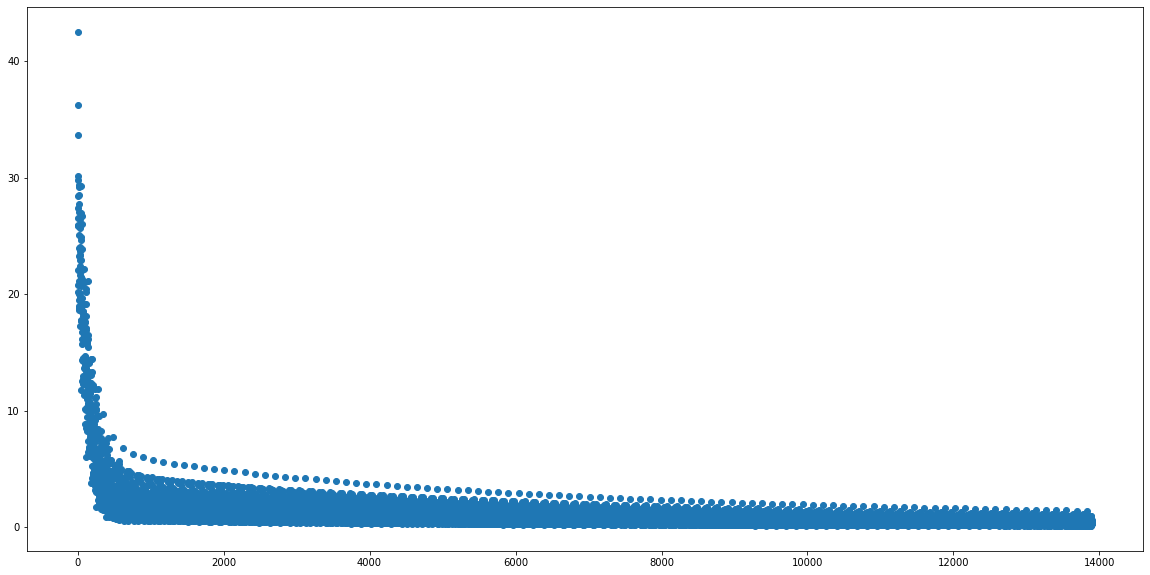

Cost after 13900 iterations: 0.6222166701955854


In [9]:
params, cost = stochastic_gradient_descent(data_train, learning_rate = 0.001, batch_size=10, ephocs=100, tolerance = 0.01)

plt.figure(figsize=(20,10))
plt.scatter(np.arange(0,len(cost)), cost)
plt.show()

print(f"Cost after {len(cost)} iterations: {cost[len(cost)-1]}")

### 1.1.2 Validation

In [10]:
def predict_values(X, params):

    X = np.c_[np.ones((X.shape[0], 1)), X]
  
    predict_values = X.dot(params)
  
    return predict_values

def mean_squared_error(Y_predicted, Y_expected):
   
    n = Y_predicted.shape[0]
    mse = (np.sum((Y_predicted - Y_expected)**2))/n
    
    return mse
    

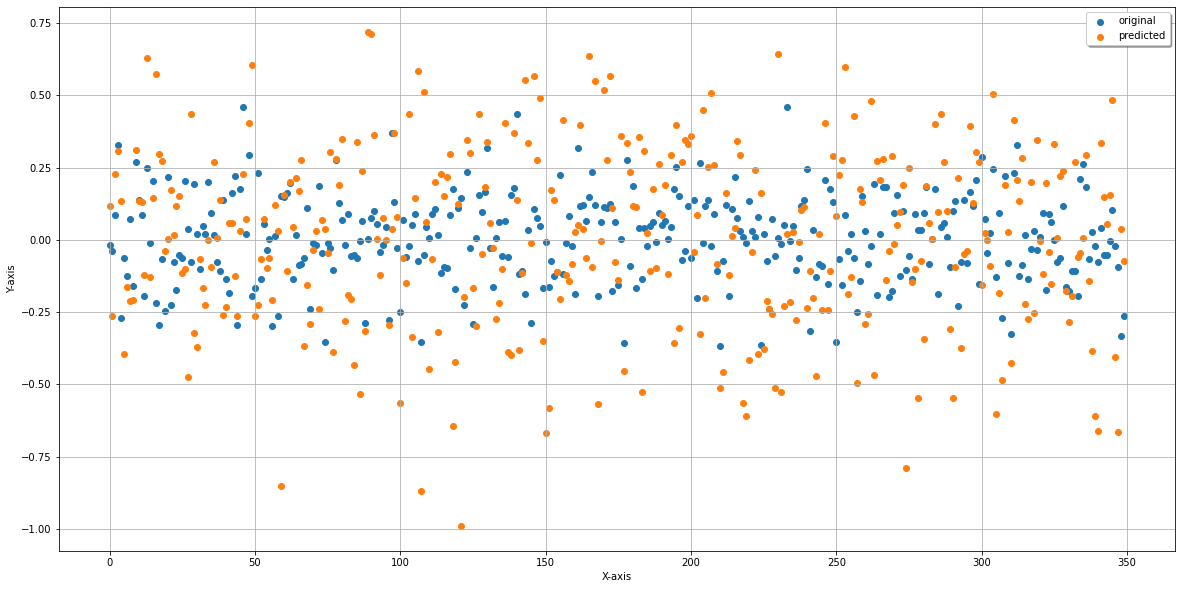

MSE: 0.0982855451310547


In [11]:
from sklearn.metrics import r2_score

X_validation = data_validation.iloc[:, :-1]
Y_validation = data_validation.iloc[:, -1]

Y_predicted = predict_values(X_validation, params)

mse = mean_squared_error(Y_predicted, Y_validation)

x_ax = range(len(Y_validation))
plt.figure(figsize=(20,10))
plt.scatter(x_ax, Y_validation, label="original")
plt.scatter(x_ax, Y_predicted, label="predicted")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

print(f"MSE: {mse}")

### 1.1.3 Test

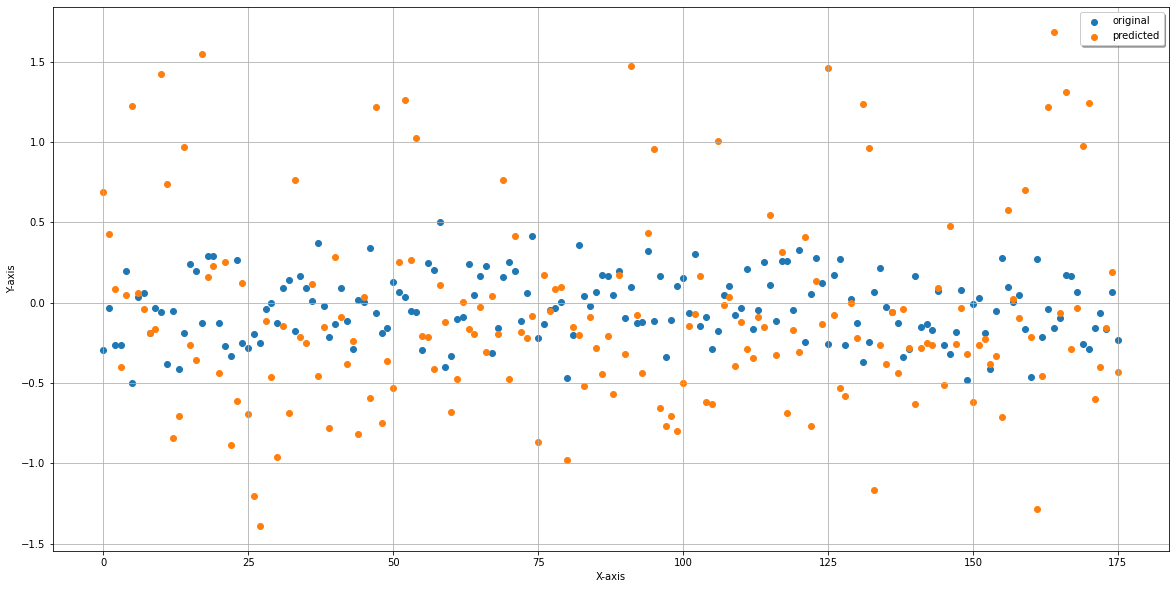

0.40742548027512204

In [12]:
X_test = data_test.iloc[:, :-1]
Y_test = data_test.iloc[:, -1]

Y_predicted_test = predict_values(X_test, params)

mse = mean_squared_error(Y_predicted_test, Y_test)

x_ax = range(len(Y_test))
plt.figure(figsize=(20,10))
plt.scatter(x_ax, Y_test, label="original")
plt.scatter(x_ax, Y_predicted_test, label="predicted")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

mse

## 1.2 Linear Regression Using Scikit-learn libraries

In [13]:
from sklearn import linear_model


X_train = data_train.iloc[:, :-1]
Y_train = data_train.iloc[:, -1]

lr = 1e-6

model = linear_model.SGDRegressor(max_iter=1000, eta0=lr)

### 1.2.1 Train Model

In [14]:
model.fit(X_train, Y_train)

SGDRegressor(eta0=1e-06)

### 1.2.2 Validation

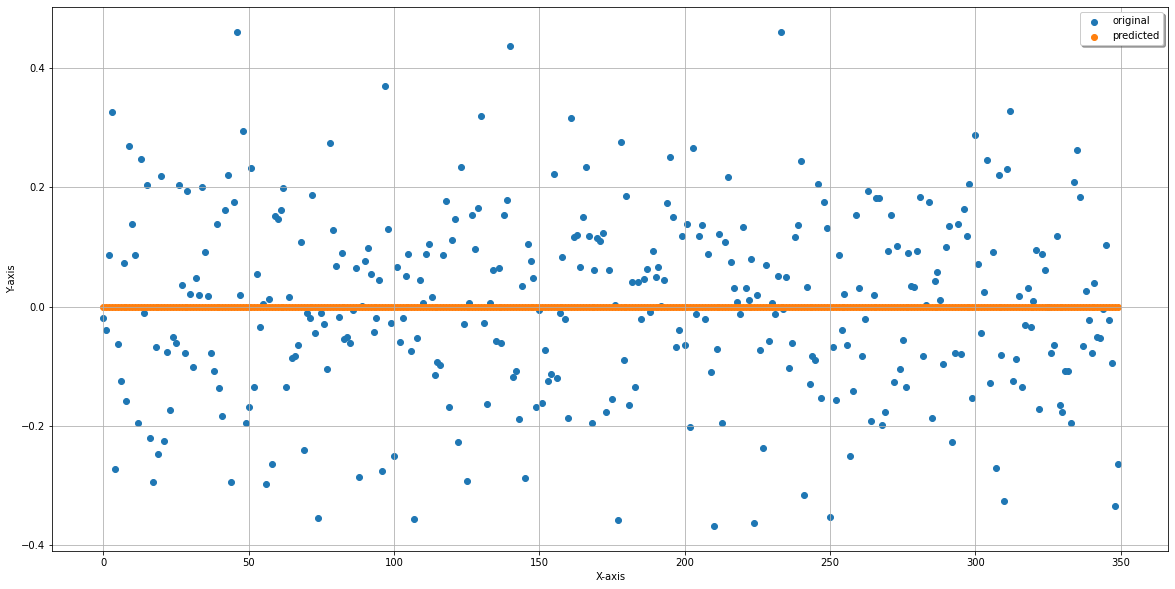

MSE: 0.023584320960216794


In [15]:
Y_skt_predicted = model.predict(X_validation)

mse = mean_squared_error(Y_skt_predicted, Y_validation)

mse

x_ax = range(len(Y_validation))
plt.figure(figsize=(20,10))
plt.scatter(x_ax, Y_validation, label="original")
plt.scatter(x_ax, Y_skt_predicted, label="predicted")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

print(f"MSE: {mse}")

### 1.2.3 Testing

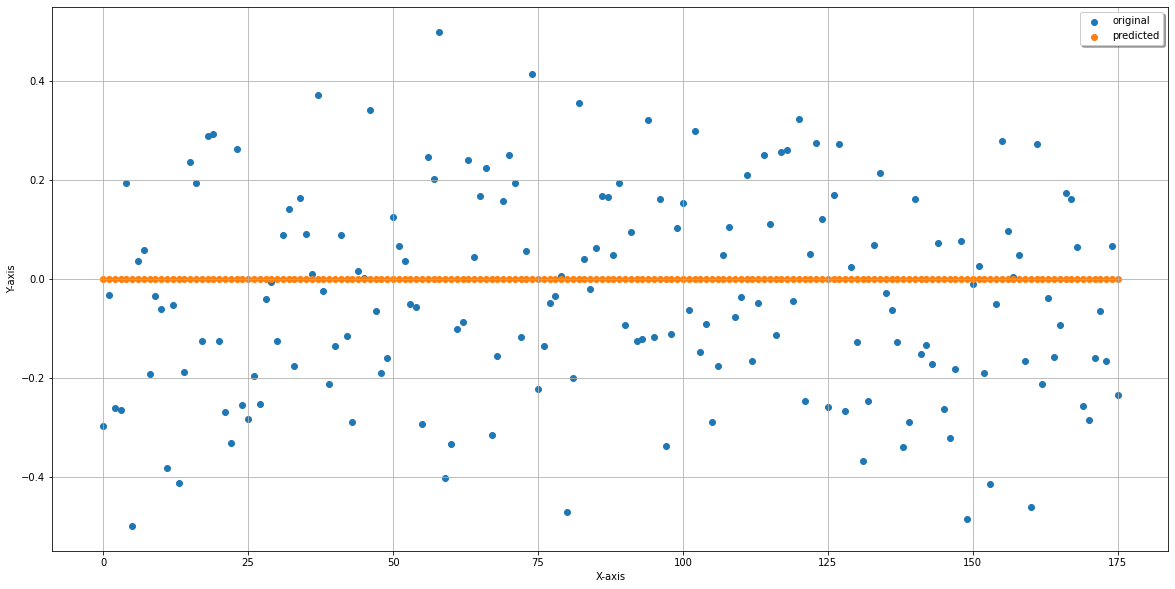

MSE: 0.043603461388182545


In [16]:
Y_skt_predicted = model.predict(X_test)

mse = mean_squared_error(Y_skt_predicted, Y_test)

x_ax = range(len(Y_test))
plt.figure(figsize=(20,10))
plt.scatter(x_ax, Y_test, label="original")
plt.scatter(x_ax, Y_skt_predicted, label="predicted")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

print(f"MSE: {mse}")

### 1.3 Conclusions

> What are the conclusions? (1-2 paragraphs)

2. (2 points) Use different Gradient Descent (GD) learning rates when optimizing. Compare the GD-based solutions with Normal Equation. What are the conclusions?


## 2.1 Sklearn SGD with different learning rates

In [17]:
from sklearn import linear_model


X_train = data_train.iloc[:, :-1]
Y_train = data_train.iloc[:, -1]

lr_a = 1e-2
lr_b = 1e-4
lr_c = 1e-6

model_a = linear_model.SGDRegressor(max_iter=1000, eta0=lr_a)
model_b = linear_model.SGDRegressor(max_iter=1000, eta0=lr_b)
model_c = linear_model.SGDRegressor(max_iter=1000, eta0=lr_c)

In [18]:
model_a.fit(X_train, Y_train)
model_b.fit(X_train, Y_train)
model_c.fit(X_train, Y_train)

SGDRegressor(eta0=1e-06)

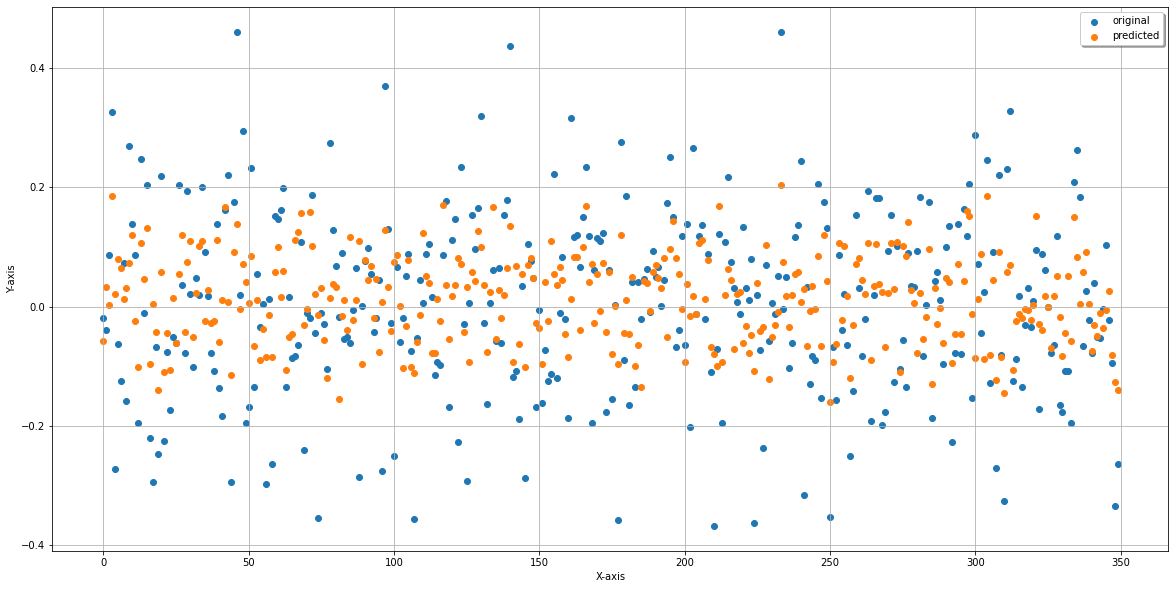

MSE: 0.015235567938459533


In [19]:
Y_skt_predicted = model_a.predict(X_validation)

mse = mean_squared_error(Y_skt_predicted, Y_validation)

mse

x_ax = range(len(Y_validation))
plt.figure(figsize=(20,10))
plt.scatter(x_ax, Y_validation, label="original")
plt.scatter(x_ax, Y_skt_predicted, label="predicted")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

print(f"MSE: {mse}")

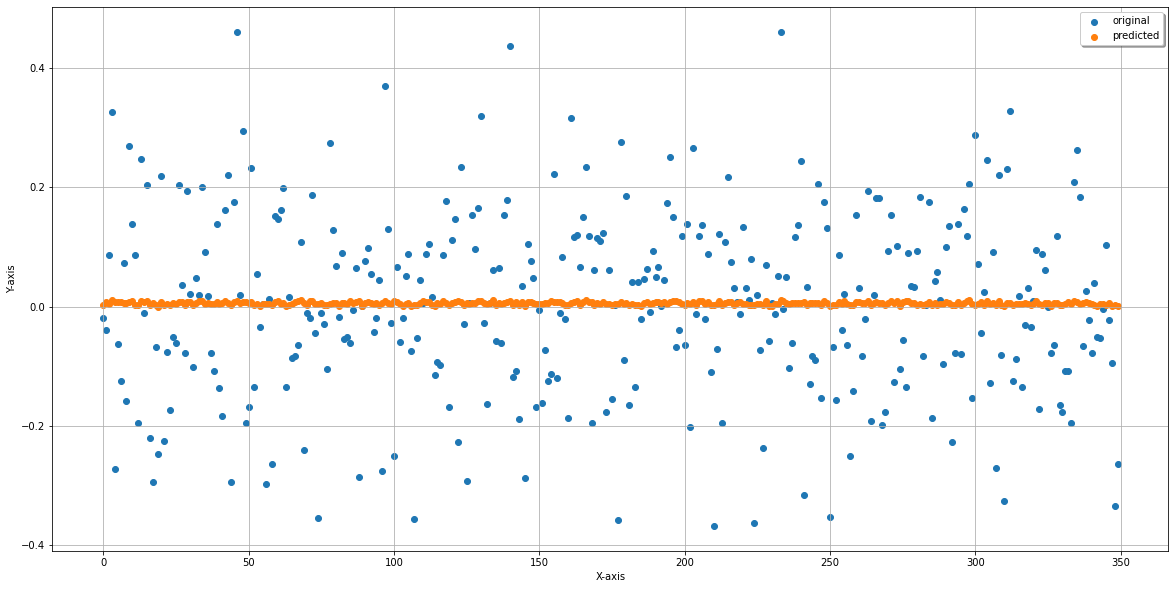

MSE: 0.02318962127330048


In [20]:
Y_skt_predicted = model_b.predict(X_validation)

mse = mean_squared_error(Y_skt_predicted, Y_validation)

mse

x_ax = range(len(Y_validation))
plt.figure(figsize=(20,10))
plt.scatter(x_ax, Y_validation, label="original")
plt.scatter(x_ax, Y_skt_predicted, label="predicted")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

print(f"MSE: {mse}")

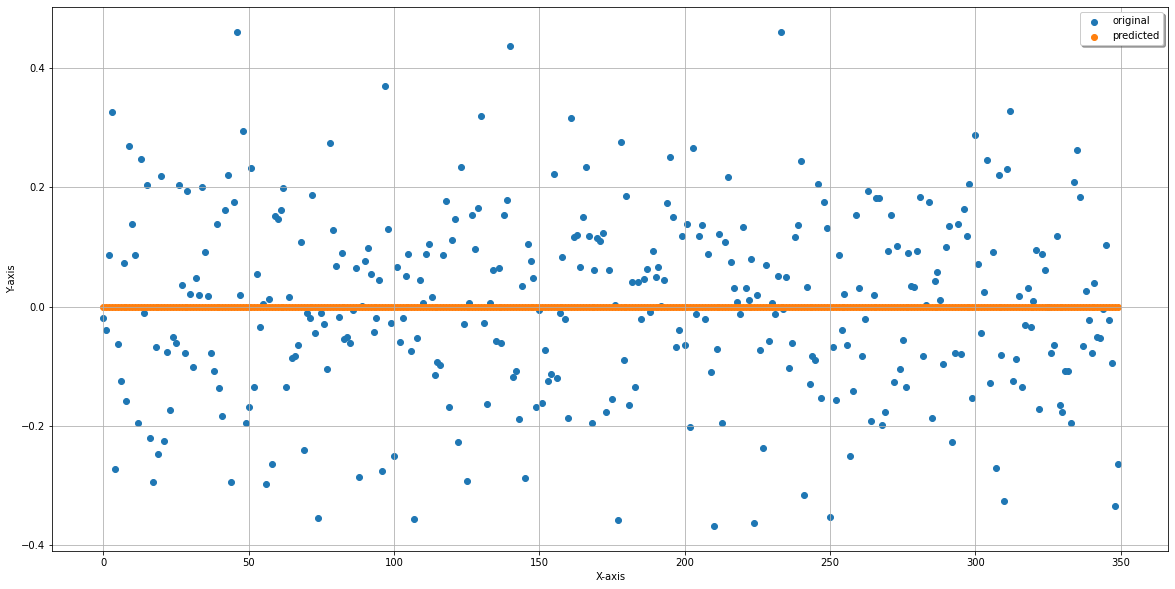

MSE: 0.023584288097154935


In [21]:
Y_skt_predicted = model_c.predict(X_validation)

mse = mean_squared_error(Y_skt_predicted, Y_validation)

mse

x_ax = range(len(Y_validation))
plt.figure(figsize=(20,10))
plt.scatter(x_ax, Y_validation, label="original")
plt.scatter(x_ax, Y_skt_predicted, label="predicted")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

print(f"MSE: {mse}")

## 2.2 Normal Equation

In [26]:
def normal_equation(X, Y):
    X = np.c_[np.ones((X.shape[0], 1)), X] 
  
    params = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)),X.T),Y)
    return params

In [27]:
params = normal_equation(X_train, Y_train)

Y_predicted = predict_values(X_validation, params)

mse = mean_squared_error(Y_skt_predicted, Y_validation)

mse

x_ax = range(len(Y_validation))
plt.figure(figsize=(20,10))
plt.scatter(x_ax, Y_validation, label="original")
plt.scatter(x_ax, Y_predicted, label="predicted")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

print(f"MSE: {mse}")


LinAlgError: Singular matrix


3. (2 points) Sometimes, we need some more complex function to make good prediction. Devise and evaluate a Polynomial Linear Regression model. 


m: 0.8614217019051288 m_val: 0.795762825707995
b: 0.002415098486050035 b_val: 0.006494790961672979
r2: 0.8557866561015439 r2_val: -0.5835330301110409


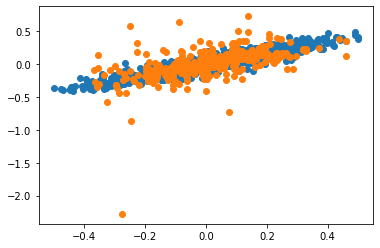

In [24]:
# TODO: Complex model. You can use scikit-learn libraries.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

degree = 2
keys = [x for x in data_train.keys() if 'target_deathrate' not in x]
X = np.array(data_train[keys])
Y = np.array(data_train["target_deathrate"])
polynomialFeatures = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polynomialFeatures.fit(X, Y)
plt.scatter(Y, polynomialFeatures.predict(X))


X_validation = np.array(data_validation[keys])
Y_validation = np.array(data_validation["target_deathrate"])
m_val, b_val = np.polyfit(Y_validation, polynomialFeatures.predict(X_validation), deg=1)
m, b = np.polyfit(Y, polynomialFeatures.predict(X), deg=1)
r2_val = r2_score(Y_validation, polynomialFeatures.predict(X_validation))
r2 = r2_score(Y, polynomialFeatures.predict(X))
print("m: " + str(m) + " m_val: " + str(m_val))
print("b: " + str(b) + " b_val: " + str(b_val))
print("r2: " + str(r2) + " r2_val: " + str(r2_val))
np.savetxt("y_validate_predict.csv", polynomialFeatures.predict(X_validation), delimiter=",")
np.savetxt("y_validate.csv", Y_validation, delimiter=",")
plt.scatter(Y_validation, polynomialFeatures.predict(X_validation))


 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

 


4. (1 point) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [ ]:
# TODO: Plot the cost function vs. number of iterations in the training set.

> What are the conclusions? (2-4 paragraphs)


## Deadline

Monday, October 11th 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you did, your grade will be penalized as follows:
- October 12th 11:59 pm : grade * 0.75
- October 13th 11:59 pm : grade * 0.5
- October 14th 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**